# Classification Case Study - Ensemble Models

### Import libraries 

In [15]:
# Importing required packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='white')

### Load data from final csv

In [16]:
train = pd.read_csv("final_train.csv")

In [17]:
X = train.drop(columns=['LoanStatus'])
y = train.LoanStatus

In [18]:
X = pd.get_dummies(X)  # One Hot Encoding 

In [19]:
X.columns

Index(['Dependents', 'LoanAmountTerm', 'CreditHistory', 'LoanAmountLog',
       'IncomeLog', 'Gender_Female', 'Gender_Male', 'Married_No',
       'Married_Yes', 'Education_Graduate', 'Education_Not Graduate',
       'SelfEmployed_No', 'SelfEmployed_Yes', 'PropertyArea_Rural',
       'PropertyArea_Semiurban', 'PropertyArea_Urban'],
      dtype='object')

### Split data into train and test data 

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

## Bagging - RandomForestClassifier 

In [63]:
from sklearn.tree import export_text
from sklearn.ensemble import RandomForestClassifier

In [116]:
model = RandomForestClassifier(n_estimators=3, max_depth=3, random_state=10)
model.fit(X_train,y_train)

RandomForestClassifier(max_depth=3, n_estimators=3, random_state=10)

In [65]:
model.score(X_train,y_train)

0.806146572104019

In [117]:
y_pred = model.predict(X_test)

In [67]:
accuracy_score(y_test,y_pred)

0.8297872340425532

In [118]:
# Print internal decision trees
for count, tree in enumerate(model.estimators_):
      # Print tree for each classifier 
      tree_rules = export_text(tree, feature_names =  list(X_train.columns))
      print("Tree : ",count + 1)
      print(tree_rules)      

Tree :  1
|--- Gender_Female <= 0.50
|   |--- LoanAmountLog <= 4.49
|   |   |--- Married_No <= 0.50
|   |   |   |--- class: 1.0
|   |   |--- Married_No >  0.50
|   |   |   |--- class: 0.0
|   |--- LoanAmountLog >  4.49
|   |   |--- PropertyArea_Rural <= 0.50
|   |   |   |--- class: 1.0
|   |   |--- PropertyArea_Rural >  0.50
|   |   |   |--- class: 1.0
|--- Gender_Female >  0.50
|   |--- SelfEmployed_No <= 0.50
|   |   |--- CreditHistory <= 0.50
|   |   |   |--- class: 0.0
|   |   |--- CreditHistory >  0.50
|   |   |   |--- class: 0.0
|   |--- SelfEmployed_No >  0.50
|   |   |--- LoanAmountTerm <= 300.00
|   |   |   |--- class: 1.0
|   |   |--- LoanAmountTerm >  300.00
|   |   |   |--- class: 1.0

Tree :  2
|--- CreditHistory <= 0.50
|   |--- LoanAmountTerm <= 240.00
|   |   |--- Dependents <= 2.00
|   |   |   |--- class: 0.0
|   |   |--- Dependents >  2.00
|   |   |   |--- class: 1.0
|   |--- LoanAmountTerm >  240.00
|   |   |--- IncomeLog <= 9.13
|   |   |   |--- class: 0.0
|   |   |

## Boosting - GradientBoostingClassifier

In [71]:
from sklearn.ensemble import GradientBoostingClassifier

In [119]:
model = GradientBoostingClassifier(n_estimators=10, max_depth=3)
model.fit(X_train,y_train)

GradientBoostingClassifier(n_estimators=10)

In [120]:
model.score(X_train,y_train)

0.8250591016548463

In [121]:
y_pred = model.predict(X_test)

In [122]:
accuracy_score(y_test,y_pred)

0.8439716312056738

In [126]:
errors = {}
tree_counts = [3,4, 5,8,10,15,20]
for count in tree_counts:
    model = GradientBoostingClassifier(n_estimators=count)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test,y_pred)
    errors[count] = 1 - score # Error    

In [127]:
errors

{3: 0.21276595744680848,
 4: 0.15602836879432624,
 5: 0.15602836879432624,
 8: 0.15602836879432624,
 10: 0.15602836879432624,
 15: 0.15602836879432624,
 20: 0.15602836879432624}

In [34]:
# Draw a graph to show error rate and no. of trees
import matplotlib.pyplot as plt

Text(0, 0.5, 'Error')

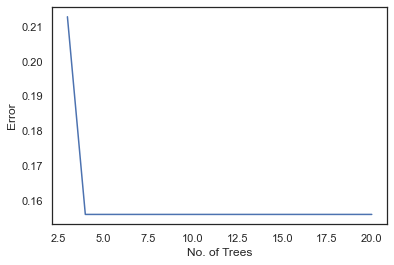

In [128]:
plt.plot(list(errors.keys()), list(errors.values()))
plt.xlabel("No. of Trees")
plt.ylabel("Error")

## Stacking  - StackingClassifier

In [130]:
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [131]:
estimators = [
    ('dt',  DecisionTreeClassifier()),
    ('knn', KNeighborsClassifier(n_neighbors=5)),
    ('svc', SVC()),
]

In [132]:
clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

In [133]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1)

In [134]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)

In [135]:
X_test_scaled = ss.transform(X_test)

In [136]:
clf.fit(X_train_scaled, y_train)

StackingClassifier(estimators=[('dt', DecisionTreeClassifier()),
                               ('knn', KNeighborsClassifier()),
                               ('svc', SVC())],
                   final_estimator=LogisticRegression())

In [137]:
clf.score(X_test_scaled, y_test)

0.8297872340425532